# UFC Automated Scoring

The goal of this notebook is to:
* Read in stored, scraped UFC data and convert it into a dataset ready for ML models
* Train, test, and analyze ML models

Functional as of April 2021

## Read in stored data

In [1]:
import numpy as np
import pandas as pd

In [2]:
STORED_FIGHT_TABLE = pd.read_csv('data/April_22_2021_better_data/FIGHT_TABLE_NUM_EVENTS_All_DATA_MODE_Summary_22-04-2021_11:08:22.csv')

In [3]:
STORED_FIGHT_TABLE

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
0,0,0,150,62,52.0,29.0,169,70,4,1,...,22,13,138,59,5,3,7,0,0,U-DEC
1,0,0,105,88,47.0,45.0,109,99,0,0,...,25,17,103,84,2,4,0,0,0,U-DEC
2,0,0,21,27,44.0,49.0,32,91,0,8,...,1,1,14,18,5,3,2,6,1,U-DEC
3,0,1,66,55,58.0,46.0,84,72,3,0,...,7,17,39,50,7,4,20,1,0,S-DEC
4,0,0,90,80,46.0,47.0,90,82,0,4,...,4,20,88,77,2,3,0,0,0,S-DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,2,0,24,16,68.0,33.0,49,31,0,1,...,12,0,17,7,4,4,3,5,0,KO/TKO Punch
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,5,2,4,1,15,23,0,0,0,S-DEC
5890,0,0,14,13,35.0,19.0,30,15,3,0,...,3,0,11,12,0,1,3,0,0,U-DEC
5891,0,0,9,3,56.0,60.0,17,11,1,0,...,2,0,2,0,5,3,2,0,0,SUB Guillotine Choke


In [263]:
# Clean dataset: Only decisions with clear winners
STORED_FIGHT_TABLE = STORED_FIGHT_TABLE[STORED_FIGHT_TABLE["Method"].str.contains("DEC")]
STORED_FIGHT_TABLE = STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Winner"] == 1) | (STORED_FIGHT_TABLE["Winner"] == 0)]
STORED_FIGHT_TABLE

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
0,0,0,150,62,52.0,29.0,169,70,4,1,...,22,13,138,59,5,3,7,0,0,U-DEC
1,0,0,105,88,47.0,45.0,109,99,0,0,...,25,17,103,84,2,4,0,0,0,U-DEC
2,0,0,21,27,44.0,49.0,32,91,0,8,...,1,1,14,18,5,3,2,6,1,U-DEC
3,0,1,66,55,58.0,46.0,84,72,3,0,...,7,17,39,50,7,4,20,1,0,S-DEC
4,0,0,90,80,46.0,47.0,90,82,0,4,...,4,20,88,77,2,3,0,0,0,S-DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,0,27,19,38.0,21.0,71,21,3,1,...,14,13,20,16,2,2,5,1,0,U-DEC
5881,0,0,16,25,55.0,47.0,29,58,0,2,...,7,2,15,7,1,0,0,18,0,S-DEC
5883,1,0,42,34,31.0,53.0,57,41,0,0,...,5,13,21,20,19,14,2,0,0,U-DEC
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,5,2,4,1,15,23,0,0,0,S-DEC


In [355]:
X = STORED_FIGHT_TABLE.drop(['Winner', 'Fighter 0 Name', 'Fighter 1 Name', 'Method'], axis=1).fillna(0)
y = STORED_FIGHT_TABLE[['Winner']]

In [359]:
X

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
0,0,0,150,62,52.0,29.0,169,70,4,1,...,13,7,22,13,138,59,5,3,7,0
1,0,0,105,88,47.0,45.0,109,99,0,0,...,26,16,25,17,103,84,2,4,0,0
2,0,0,21,27,44.0,49.0,32,91,0,8,...,9,2,1,1,14,18,5,3,2,6
3,0,1,66,55,58.0,46.0,84,72,3,0,...,19,8,7,17,39,50,7,4,20,1
4,0,0,90,80,46.0,47.0,90,82,0,4,...,12,20,4,20,88,77,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,0,27,19,38.0,21.0,71,21,3,1,...,4,1,14,13,20,16,2,2,5,1
5881,0,0,16,25,55.0,47.0,29,58,0,2,...,0,0,7,2,15,7,1,0,0,18
5883,1,0,42,34,31.0,53.0,57,41,0,0,...,9,14,5,13,21,20,19,14,2,0
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,12,20,5,2,4,1,15,23,0,0


In [358]:
y

,Winner
0,0
1,0
2,1
3,0
4,0
...,...
5880,0
5881,0
5883,0
5889,0


## Setup train/validate/test split with data augmentation

TODO: Add in smarter data augmentation that create new datapoints nearby.

In [267]:
def create_flipped_table(table):
    '''Rearranges columns of table so that each fight has two rows. Let fighters be A and B.
       One row has (Fighter 0 = A, Fighter 1 = B). One row has (Fighter 0 = B, Fighter 1 = A)
       Ensure same column order, as column names not looked at when passed to ML model'''

    # Get columns in flipped order, which moves the columns around, but changes column name order too
    flipped_columns = []
    for column in table.columns:
        if "Fighter 0" in column:
            flipped_columns.append(column.replace("Fighter 0", "Fighter 1"))
        elif "Fighter 1" in column:
            flipped_columns.append(column.replace("Fighter 1", "Fighter 0"))
        else:
            flipped_columns.append(column)
    flipped_table = table[flipped_columns]

    # Flips winners around
    if 'Winner' in flipped_table.columns:
         flipped_table['Winner'] = flipped_table['Winner'].replace([0, 1], [1, 0])

    # Change column names back to normal
    flipped_table.columns = table.columns
    return flipped_table


def add_rows_of_flipped_columns(table):
    flipped_table = create_flipped_table(table)
    new_table = pd.concat([table, flipped_table])
    return new_table

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=0)
X_train, y_train = add_rows_of_flipped_columns(X_train), add_rows_of_flipped_columns(y_train)
X_valid, y_valid = add_rows_of_flipped_columns(X_valid), add_rows_of_flipped_columns(y_valid)
X_test, y_test = add_rows_of_flipped_columns(X_test), add_rows_of_flipped_columns(y_test)

In [582]:
# Expect equal number of examples in Fighter 0 as Fighter 1 from data augmentation
assert(len(y_train[y_train['Winner'] == 0]) == len(y_train[y_train['Winner'] == 1]))
assert(len(y_valid[y_valid['Winner'] == 0]) == len(y_valid[y_valid['Winner'] == 1]))
assert(len(y_test[y_test['Winner'] == 0]) == len(y_test[y_test['Winner'] == 1]))

In [583]:
X_train

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
1730,0,0,33,66,33.0,39.0,76,81,1,4,...,8,19,3,14,31,53,2,8,0,5
4671,0,0,28,14,31.0,25.0,83,27,1,3,...,8,6,3,6,9,9,15,3,4,2
2465,0,0,104,27,67.0,37.0,193,32,7,0,...,26,4,5,0,24,20,32,5,48,2
2417,0,0,39,94,34.0,54.0,67,140,4,0,...,7,9,12,3,38,94,0,0,1,0
5204,1,0,26,16,39.0,40.0,79,155,2,1,...,3,2,0,3,4,14,2,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,0,0,87,87,34.0,41.0,87,98,0,0,...,16,14,11,15,80,84,7,3,0,0
2849,0,0,42,35,43.0,49.0,98,43,1,9,...,14,4,1,1,20,18,20,5,2,12
2057,0,0,50,18,54.0,50.0,96,52,1,6,...,16,1,7,7,31,9,1,1,18,8
26,0,0,71,27,47.0,39.0,131,32,3,2,...,14,10,3,1,48,26,4,1,19,0


In [584]:
y_train

,Winner
1730,1
4671,0
2465,0
2417,1
5204,0
...,...
2949,0
2849,1
2057,0
26,0


In [585]:
print(f"X_train.shape = {X_train.shape}")
print(f"X_valid.shape = {X_valid.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_valid.shape = {y_valid.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (2408, 30)
X_valid.shape = (1188, 30)
X_test.shape = (1774, 30)
y_train.shape = (2408, 1)
y_valid.shape = (1188, 1)
y_test.shape = (1774, 1)


## Train and test ML models

In [586]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def get_predIdxs_and_trueIdxs(classifier, X, y):
    predIdxs = np.where(classifier.predict(X) > 0.5, 1, 0)
    trueIdxs = y
    return predIdxs, trueIdxs

def plot_confusion_matrix(classifier, X, y):
    predIdxs, trueIdxs = get_predIdxs_and_trueIdxs(classifier, X, y)
    cm = confusion_matrix(trueIdxs, predIdxs)
    cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
    cmDisplay.plot()
    
def print_classification_report(classifier, X, y):
    predIdxs, trueIdxs = get_predIdxs_and_trueIdxs(classifier, X, y)
    print(classification_report(trueIdxs, predIdxs, target_names=["Fighter 0 Win", "Fighter 1 Win"]))

### Random forest

/home/tylerlum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accuracy_train = 0.8945182724252492
accuracy_valid = 0.8392255892255892


<BarContainer object of 30 artists>

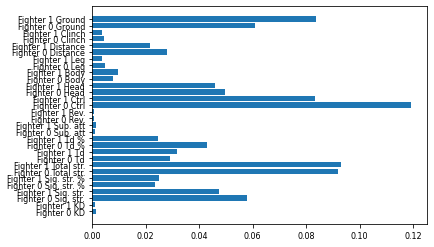

In [617]:
from sklearn.ensemble import RandomForestClassifier

# Train
random_forest_clf = RandomForestClassifier(max_depth=5, random_state=0)
random_forest_clf.fit(X_train, y_train)

# Validate
accuracy_train = random_forest_clf.score(X_train, y_train)
accuracy_valid = random_forest_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, random_forest_clf.feature_importances_)

               precision    recall  f1-score   support

Fighter 0 Win       0.84      0.84      0.84       594
Fighter 1 Win       0.84      0.84      0.84       594

     accuracy                           0.84      1188
    macro avg       0.84      0.84      0.84      1188
 weighted avg       0.84      0.84      0.84      1188



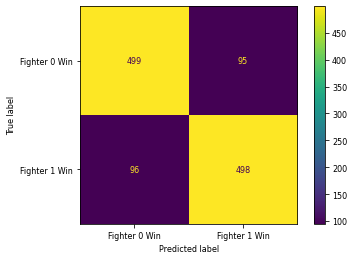

In [640]:
plot_confusion_matrix(random_forest_clf, X_valid, y_valid)
print_classification_report(random_forest_clf, X_valid, y_valid)

### MLP

In [619]:
# MLP
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
accuracy_train = mlp_clf.score(X_train, y_train)
accuracy_valid = mlp_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/home/tylerlum/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy_train = 0.7657807308970099
accuracy_valid = 0.7617845117845118


               precision    recall  f1-score   support

Fighter 0 Win       0.94      0.56      0.70       594
Fighter 1 Win       0.69      0.96      0.80       594

     accuracy                           0.76      1188
    macro avg       0.81      0.76      0.75      1188
 weighted avg       0.81      0.76      0.75      1188



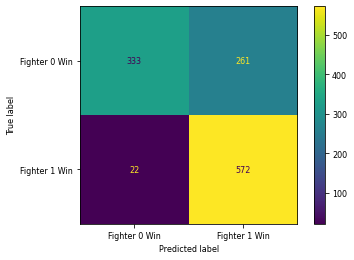

In [639]:
plot_confusion_matrix(mlp_clf, X_valid, y_valid)
print_classification_report(mlp_clf, X_valid, y_valid)

### SVM

In [621]:
# SVM
from sklearn.svm import SVC

svm_clf = SVC(random_state=1).fit(X_train, y_train)
accuracy_train = svm_clf.score(X_train, y_train)
accuracy_valid = svm_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/home/tylerlum/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy_train = 0.8567275747508306
accuracy_valid = 0.8333333333333334


               precision    recall  f1-score   support

Fighter 0 Win       0.83      0.83      0.83       594
Fighter 1 Win       0.83      0.83      0.83       594

     accuracy                           0.83      1188
    macro avg       0.83      0.83      0.83      1188
 weighted avg       0.83      0.83      0.83      1188



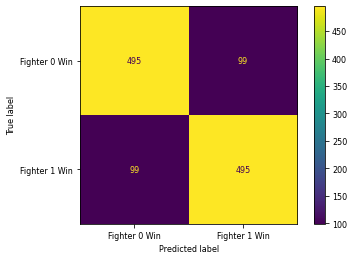

In [638]:
plot_confusion_matrix(svm_clf, X_valid, y_valid)
print_classification_report(svm_clf, X_valid, y_valid)

### Deep model

In [623]:
# FFN
import tensorflow as tf

deep_model = tf.keras.models.Sequential()
deep_model.add(tf.keras.Input(shape=X_train.shape[1:]))
deep_model.add(tf.keras.layers.Dense(32, activation='relu'))
deep_model.add(tf.keras.layers.Dense(32, activation='relu'))
deep_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deep_model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 32)                992       
_________________________________________________________________
dense_175 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [624]:
H = deep_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
deep_model.evaluate(X_train, y_train)
deep_model.evaluate(X_valid, y_valid)

Train on 2408 samples, validate on 1188 samples
Epoch 1/100
2408/2408 [==============================] - 1s 336us/sample - loss: 2.9963 - acc: 0.7006 - val_loss: 0.8890 - val_acc: 0.8114
Epoch 2/100
2408/2408 [==============================] - 0s 49us/sample - loss: 0.8419 - acc: 0.8098 - val_loss: 0.6557 - val_acc: 0.8165
Epoch 3/100
2408/2408 [==============================] - 0s 48us/sample - loss: 0.6893 - acc: 0.8086 - val_loss: 0.6258 - val_acc: 0.8199
Epoch 4/100
2408/2408 [==============================] - 0s 49us/sample - loss: 0.5655 - acc: 0.8198 - val_loss: 0.5119 - val_acc: 0.8342
Epoch 5/100
2408/2408 [==============================] - 0s 47us/sample - loss: 0.5406 - acc: 0.8210 - val_loss: 0.4683 - val_acc: 0.8401
Epoch 6/100
2408/2408 [==============================] - 0s 46us/sample - loss: 0.4927 - acc: 0.8264 - val_loss: 0.4587 - val_acc: 0.8367
Epoch 7/100
2408/2408 [==============================] - 0s 44us/sample - loss: 0.4382 - acc: 0.8339 - val_loss: 0.5889 - v

2408/2408 [==============================] - 0s 47us/sample - loss: 0.2819 - acc: 0.8841 - val_loss: 0.4021 - val_acc: 0.8476
Epoch 60/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.2972 - acc: 0.8729 - val_loss: 0.4552 - val_acc: 0.8266
Epoch 61/100
2408/2408 [==============================] - 0s 54us/sample - loss: 0.3257 - acc: 0.8642 - val_loss: 0.4082 - val_acc: 0.8409
Epoch 62/100
2408/2408 [==============================] - 0s 52us/sample - loss: 0.2792 - acc: 0.8829 - val_loss: 0.4335 - val_acc: 0.8224
Epoch 63/100
2408/2408 [==============================] - 0s 52us/sample - loss: 0.2954 - acc: 0.8746 - val_loss: 0.4144 - val_acc: 0.8359
Epoch 64/100
2408/2408 [==============================] - 0s 47us/sample - loss: 0.2872 - acc: 0.8850 - val_loss: 0.4820 - val_acc: 0.8165
Epoch 65/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.2818 - acc: 0.8841 - val_loss: 0.4107 - val_acc: 0.8409
Epoch 66/100
2408/2408 [================

[0.4159380622985788, 0.8400673]

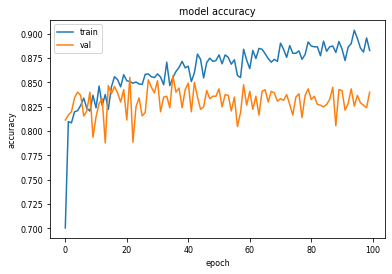

In [625]:
from matplotlib import pyplot as plt
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

               precision    recall  f1-score   support

Fighter 0 Win       0.84      0.84      0.84       594
Fighter 1 Win       0.84      0.84      0.84       594

     accuracy                           0.84      1188
    macro avg       0.84      0.84      0.84      1188
 weighted avg       0.84      0.84      0.84      1188



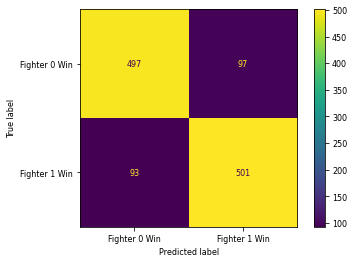

In [637]:
plot_confusion_matrix(deep_model, X_valid, y_valid)
print_classification_report(deep_model, X_valid, y_valid)

### Comparison Model

In [687]:
from tensorflow.keras.layers import Input, Lambda, Subtract, Activation
from tensorflow.keras.models import Model
def create_comparison_model(input_shape):
    num_features_per_fighter = input_shape[0] // 2

    model_ = tf.keras.models.Sequential()
    model_.add(tf.keras.Input(shape=num_features_per_fighter))
    model_.add(tf.keras.layers.Dense(32, activation='relu'))
    model_.add(tf.keras.layers.Dense(32, activation='relu'))
    model_.add(tf.keras.layers.Dropout(0.5))

    model_.add(tf.keras.layers.Dense(1, activation='relu'))
    
    # Run cnn model on each frame
    input_tensor = Input(shape=input_shape)
    fighter0_state = Lambda(lambda x: x[:, :num_features_per_fighter], name='fighter0_state')(input_tensor)
    fighter1_state = Lambda(lambda x: x[:, num_features_per_fighter:], name='fighter1_state')(input_tensor)

    fighter0_score = model_(fighter0_state)
    fighter1_score = model_(fighter1_state)
    fighter0_score = Lambda(lambda x: x, name='fighter0_score')(fighter0_score)
    fighter1_score = Lambda(lambda x: x, name='fighter1_score')(fighter1_score)
    
    difference_score = Subtract(name='subtracter')([fighter1_score, fighter0_score])
    prediction = Activation('sigmoid')(difference_score)
    return Model(inputs=input_tensor, outputs=prediction)

In [688]:
comparison_model = create_comparison_model(X_train_new.shape[1:])
optimizer = tf.keras.optimizers.Adam(lr=0.001)
comparison_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
comparison_model.summary()

Model: "model_74"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_116 (InputLayer)          [(None, 30)]         0                                            
__________________________________________________________________________________________________
fighter1_state (Lambda)         (None, 15)           0           input_116[0][0]                  
__________________________________________________________________________________________________
fighter0_state (Lambda)         (None, 15)           0           input_116[0][0]                  
__________________________________________________________________________________________________
sequential_62 (Sequential)      (None, 1)            1601        fighter0_state[0][0]             
                                                                 fighter1_state[0][0]      

In [689]:
fighter0_columns = [col for col in X_train.columns if "Fighter 0" in col]
fighter1_columns = [col for col in X_train.columns if "Fighter 1" in col]
print(f"fighter0_columns = {fighter0_columns}")
print(f"fighter1_columns = {fighter1_columns}")

fighter0_columns = ['Fighter 0 KD', 'Fighter 0 Sig. str.', 'Fighter 0 Sig. str. %', 'Fighter 0 Total str.', 'Fighter 0 Td', 'Fighter 0 Td %', 'Fighter 0 Sub. att', 'Fighter 0 Rev.', 'Fighter 0 Ctrl', 'Fighter 0 Head', 'Fighter 0 Body', 'Fighter 0 Leg', 'Fighter 0 Distance', 'Fighter 0 Clinch', 'Fighter 0 Ground']
fighter1_columns = ['Fighter 1 KD', 'Fighter 1 Sig. str.', 'Fighter 1 Sig. str. %', 'Fighter 1 Total str.', 'Fighter 1 Td', 'Fighter 1 Td %', 'Fighter 1 Sub. att', 'Fighter 1 Rev.', 'Fighter 1 Ctrl', 'Fighter 1 Head', 'Fighter 1 Body', 'Fighter 1 Leg', 'Fighter 1 Distance', 'Fighter 1 Clinch', 'Fighter 1 Ground']


In [690]:
X0_train = X_train[fighter0_columns]
X1_train = X_train[fighter1_columns]
X0_valid = X_valid[fighter0_columns]
X1_valid = X_valid[fighter1_columns]
X0_test = X_test[fighter0_columns]
X1_test = X_test[fighter1_columns]

In [691]:
X_train_new = pd.concat([X0_train, X1_train], axis=1)
X_valid_new = pd.concat([X0_valid, X1_valid], axis=1) 
X_test_new = pd.concat([X0_test, X1_test], axis=1)

In [692]:
means, stds = X_train_new.mean(), X_train_new.std()

In [693]:
X_train_new_normal = (X_train_new - means) / stds
X_valid_new_normal = (X_valid_new - means) / stds
X_test_new_normal = (X_test_new - means) / stds

In [694]:
X_train_new

,Fighter 0 KD,Fighter 0 Sig. str.,Fighter 0 Sig. str. %,Fighter 0 Total str.,Fighter 0 Td,Fighter 0 Td %,Fighter 0 Sub. att,Fighter 0 Rev.,Fighter 0 Ctrl,Fighter 0 Head,...,Fighter 1 Td %,Fighter 1 Sub. att,Fighter 1 Rev.,Fighter 1 Ctrl,Fighter 1 Head,Fighter 1 Body,Fighter 1 Leg,Fighter 1 Distance,Fighter 1 Clinch,Fighter 1 Ground
1730,0,33,33.0,76,1,100.0,0,0,17.0,22,...,80.0,0,0,169.0,33,19,14,53,8,5
4671,0,28,31.0,83,1,100.0,1,0,27.0,17,...,60.0,1,1,404.0,2,6,6,9,3,2
2465,0,104,67.0,193,7,63.0,0,0,522.0,73,...,0.0,2,0,63.0,23,4,0,20,5,2
2417,0,39,34.0,67,4,40.0,0,0,329.0,20,...,0.0,0,0,37.0,82,9,3,94,0,0
5204,1,26,39.0,79,2,100.0,3,2,648.0,23,...,50.0,0,1,155.0,11,2,3,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,0,87,34.0,87,0,0.0,0,0,24.0,60,...,0.0,0,0,102.0,58,14,15,84,3,0
2849,0,42,43.0,98,1,50.0,0,0,5.0,27,...,56.0,0,0,475.0,30,4,1,18,5,12
2057,0,50,54.0,96,1,100.0,2,0,1.0,27,...,85.0,0,0,600.0,10,1,7,9,1,8
26,0,71,47.0,131,3,75.0,0,1,280.0,54,...,50.0,1,1,209.0,16,10,1,26,1,0


In [695]:
X_train_new_normal

,Fighter 0 KD,Fighter 0 Sig. str.,Fighter 0 Sig. str. %,Fighter 0 Total str.,Fighter 0 Td,Fighter 0 Td %,Fighter 0 Sub. att,Fighter 0 Rev.,Fighter 0 Ctrl,Fighter 0 Head,...,Fighter 1 Td %,Fighter 1 Sub. att,Fighter 1 Rev.,Fighter 1 Ctrl,Fighter 1 Head,Fighter 1 Body,Fighter 1 Leg,Fighter 1 Distance,Fighter 1 Clinch,Fighter 1 Ground
1730,-0.305299,-0.534333,-0.750733,-0.016341,-0.278075,2.083169,-0.430413,-0.384637,-0.874148,-0.392728,...,1.486555,-0.430413,-0.384637,-0.135387,0.108843,0.990861,0.603269,0.568862,0.079259,-0.064462
4671,-0.305299,-0.698583,-0.910282,0.159217,-0.278075,2.083169,0.646962,-0.384637,-0.825545,-0.620714,...,0.889941,0.646962,1.659969,1.006776,-1.304674,-0.478068,-0.261931,-0.934856,-0.500146,-0.389429
2465,-0.305299,1.798025,1.961593,2.917992,2.663083,0.979433,-0.430413,-0.384637,1.580288,1.932736,...,-0.899901,1.724338,-0.384637,-0.650576,-0.347131,-0.704057,-0.910832,-0.558927,-0.268384,-0.389429
2417,-0.305299,-0.337232,-0.670959,-0.242059,1.192504,0.293327,-0.430413,-0.384637,0.642256,-0.483922,...,-0.899901,-0.430413,-0.384637,-0.776943,2.343112,-0.139085,-0.586382,1.970053,-0.847790,-0.606073
5204,2.329682,-0.764283,-0.272087,0.058898,0.212118,2.083169,2.801714,3.704575,2.192682,-0.347131,...,0.591634,-0.430413,1.659969,-0.203431,-0.894298,-0.930046,-0.586382,-0.763979,-0.731909,-0.497751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,-0.305299,1.239573,-0.670959,0.259536,-0.768267,-0.899901,-0.430413,-0.384637,-0.840126,1.339971,...,-0.899901,-0.430413,-0.384637,-0.461025,1.248776,0.425888,0.711419,1.628299,-0.500146,-0.606073
2849,-0.305299,-0.238682,0.047010,0.535413,-0.278075,0.591634,-0.430413,-0.384637,-0.932471,-0.164741,...,0.770618,-0.430413,-0.384637,1.351855,-0.027949,-0.704057,-0.802682,-0.627278,-0.268384,0.693792
2057,-0.305299,0.024119,0.924527,0.485254,-0.278075,2.083169,1.724338,-0.384637,-0.951912,-0.164741,...,1.635709,-0.430413,-0.384637,1.959389,-0.939896,-1.043041,-0.153781,-0.934856,-0.731909,0.260504
26,-0.305299,0.713971,0.366107,1.363046,0.702311,1.337402,-0.430413,1.659969,0.404103,1.066387,...,0.591634,0.646962,1.659969,0.059024,-0.666312,-0.026090,-0.802682,-0.353874,-0.731909,-0.606073


In [696]:
H = comparison_model.fit(X_train_new_normal, y_train, epochs=100, validation_data=(X_valid_new_normal, y_valid))

Train on 2408 samples, validate on 1188 samples
Epoch 1/100
2408/2408 [==============================] - 1s 395us/sample - loss: 0.5586 - acc: 0.7085 - val_loss: 0.4120 - val_acc: 0.8249
Epoch 2/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.4372 - acc: 0.8102 - val_loss: 0.3874 - val_acc: 0.8316
Epoch 3/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.3888 - acc: 0.8335 - val_loss: 0.3743 - val_acc: 0.8367
Epoch 4/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.3847 - acc: 0.8256 - val_loss: 0.3729 - val_acc: 0.8493
Epoch 5/100
2408/2408 [==============================] - 0s 52us/sample - loss: 0.3896 - acc: 0.8264 - val_loss: 0.3734 - val_acc: 0.8460
Epoch 6/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.3776 - acc: 0.8409 - val_loss: 0.3673 - val_acc: 0.8527
Epoch 7/100
2408/2408 [==============================] - 0s 53us/sample - loss: 0.3723 - acc: 0.8534 - val_loss: 0.3709 - v

2408/2408 [==============================] - 0s 55us/sample - loss: 0.2549 - acc: 0.8945 - val_loss: 0.3854 - val_acc: 0.8502
Epoch 60/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.2567 - acc: 0.8958 - val_loss: 0.3776 - val_acc: 0.8519
Epoch 61/100
2408/2408 [==============================] - 0s 57us/sample - loss: 0.2540 - acc: 0.9007 - val_loss: 0.3839 - val_acc: 0.8519
Epoch 62/100
2408/2408 [==============================] - 0s 53us/sample - loss: 0.2483 - acc: 0.8962 - val_loss: 0.3971 - val_acc: 0.8434
Epoch 63/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.2476 - acc: 0.8953 - val_loss: 0.3905 - val_acc: 0.8535
Epoch 64/100
2408/2408 [==============================] - 0s 55us/sample - loss: 0.2461 - acc: 0.9032 - val_loss: 0.3912 - val_acc: 0.8519
Epoch 65/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.2485 - acc: 0.8924 - val_loss: 0.3995 - val_acc: 0.8451
Epoch 66/100
2408/2408 [================

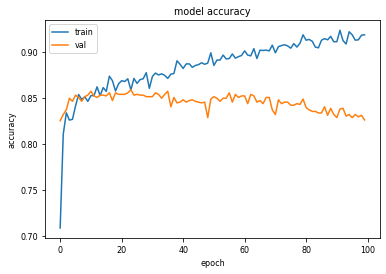

In [697]:
from matplotlib import pyplot as plt
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

               precision    recall  f1-score   support

Fighter 0 Win       0.82      0.84      0.83       594
Fighter 1 Win       0.83      0.82      0.82       594

     accuracy                           0.83      1188
    macro avg       0.83      0.83      0.83      1188
 weighted avg       0.83      0.83      0.83      1188



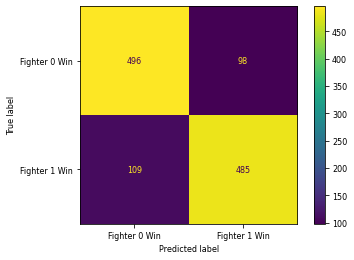

In [698]:
plot_confusion_matrix(comparison_model, X_valid_new_normal, y_valid)
print_classification_report(comparison_model, X_valid_new_normal, y_valid)

In [700]:
lo, hi = 11, 20

In [701]:
X_test_new[lo:hi]

,Fighter 0 KD,Fighter 0 Sig. str.,Fighter 0 Sig. str. %,Fighter 0 Total str.,Fighter 0 Td,Fighter 0 Td %,Fighter 0 Sub. att,Fighter 0 Rev.,Fighter 0 Ctrl,Fighter 0 Head,...,Fighter 1 Td %,Fighter 1 Sub. att,Fighter 1 Rev.,Fighter 1 Ctrl,Fighter 1 Head,Fighter 1 Body,Fighter 1 Leg,Fighter 1 Distance,Fighter 1 Clinch,Fighter 1 Ground
1705,0,63,45.0,84,1,100.0,0,0,280.0,40,...,20.0,0,0,146.0,18,8,8,26,3,5
1058,0,77,44.0,125,0,0.0,0,0,0.0,29,...,0.0,0,0,278.0,21,31,15,54,8,5
619,0,134,44.0,135,0,0.0,0,0,2.0,85,...,0.0,0,0,45.0,67,15,75,156,1,0
3465,0,16,34.0,51,2,50.0,3,0,521.0,10,...,0.0,0,1,14.0,14,2,3,19,0,0
5609,0,88,47.0,96,2,22.0,1,0,154.0,62,...,0.0,0,0,19.0,55,1,1,43,14,0
2047,0,20,50.0,83,2,33.0,0,0,744.0,12,...,0.0,0,1,40.0,5,4,2,6,5,0
2097,0,61,36.0,68,2,40.0,0,0,52.0,39,...,0.0,0,1,178.0,55,15,12,75,5,2
251,0,20,27.0,29,5,45.0,0,0,416.0,7,...,20.0,0,2,72.0,34,4,9,35,6,6
965,0,53,62.0,95,2,50.0,0,0,551.0,41,...,100.0,0,0,101.0,16,5,9,24,4,2


In [703]:
comparison_model.predict(X_test_new_normal[lo:hi])

array([[1.9139588e-02],
       [9.7522759e-01],
       [8.2897270e-01],
       [2.2666126e-02],
       [1.2177825e-02],
       [4.6143234e-03],
       [8.9319360e-01],
       [7.6247615e-01],
       [7.1752421e-04]], dtype=float32)

In [704]:
y_test[lo:hi]

,Winner
1705,0
1058,1
619,1
3465,0
5609,0
2047,0
2097,1
251,1
965,0


In [707]:
subtracter = comparison_model.get_layer('subtracter').output
subtracter = Model(comparison_model.input, subtracter)
subtracter.predict(X_test_new_normal[lo:hi])

array([[-3.9366698],
       [ 3.6729395],
       [ 1.5783639],
       [-3.763956 ],
       [-4.3958893],
       [-5.3739586],
       [ 2.1237857],
       [ 1.1663032],
       [-7.238986 ]], dtype=float32)

In [708]:
fighter0_score = comparison_model.get_layer('fighter0_score').output
fighter0_score = Model(comparison_model.input, fighter0_score)
fighter0_score.predict(X_test_new_normal[lo:hi])

array([[5.431978 ],
       [2.4471805],
       [7.810386 ],
       [3.763956 ],
       [7.318753 ],
       [5.3739586],
       [3.21725  ],
       [2.3597665],
       [9.225725 ]], dtype=float32)

In [709]:
fighter1_score = comparison_model.get_layer('fighter1_score').output
fighter1_score = Model(comparison_model.input, fighter1_score)
fighter1_score.predict(X_test_new_normal[lo:hi])

array([[1.4953083],
       [6.12012  ],
       [9.38875  ],
       [0.       ],
       [2.9228632],
       [0.       ],
       [5.341036 ],
       [3.5260696],
       [1.9867389]], dtype=float32)